In [1]:
api_token = 'XXXXXXX'

In [2]:
pip install vk_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
# https://regvk.com/id/  website for finding the id of public page in VK

In [20]:
#posts from 2023 year
import vk_api
from datetime import datetime

def get_posts_in_period(api_token, group_id, count=100, max_posts=3900):
    # Get posts from the public page
    try:
        # Initialization VK API session
        vk_session = vk_api.VkApi(token=api_token)
        vk = vk_session.get_api()

        all_posts = []

        offset = 0
        while True:
            # Request
            response = vk.wall.get(owner_id=group_id, filter="owner", count=count, offset=offset)

            if 'items' in response:
                all_posts.extend(response['items'])

                # Going to the next "page"
                offset += count

                if max_posts and len(all_posts) >= max_posts:
                    break
            else:
                print("No more posts found.")
                break

        return all_posts

    except vk_api.exceptions.ApiError as e:
        print(f"API error: {e}")
        return []


api_token = api_token
group_id = "-35068738"  #m24

posts = get_posts_in_period(api_token, group_id, max_posts=3900)

pos = []

if posts:
    print(f"Found {len(posts)} posts:")
    for post in posts:
        post_date = datetime.fromtimestamp(post['date']).strftime("%Y-%m-%d")
        pos.append([post['text'], post_date])
else:
    print("No posts found.")

import pandas as pd
df = pd.DataFrame(pos, columns = ['article', 'date'])
df


Found 3900 posts:


,article,date
0,🏆 В 40-е годы XX века СССР начинает ковать поб...,2023-10-10
1,💬 «Экономика Москвы успешно адаптировалась к с...,2023-10-10
2,🥶 Ночь на среду может стать самой холодной в М...,2023-10-10
3,🧑‍⚕ На Украине женщины-фармацевты должны встат...,2023-10-10
4,Скорость строительства новых транспортных разв...,2023-10-10
...,...,...
3895,😱 Плюс ещё одна фобия: в центре Питера во врем...,2023-05-26
3896,📦 Икона «Троица» Рублёва отправится в храм Хри...,2023-05-26
3897,"То в жар, то в холод 😱 \n \n⛈ Пока Москву зали...",2023-05-26
3898,🧐 Надеть мусорный пакет на голову? Это вчерашн...,2023-05-26


In [21]:
#filter (months June - September) and key words like Sobyanin, mayor
up_line_month = df['date'].apply(lambda x: int(x[5:7])) <= 9
down_line_month = df['date'].apply(lambda x: int(x[5:7])) >= 6

sobyanin_msk_23 = df[((df['article'].str.contains('Собянин') == True)|(df['article'].str.contains('мэр') == True)|(df['article'].str.contains('Сергей Семёнович') == True))&(up_line_month == True)&(down_line_month == True)]
sobyanin_msk_23

,article,date
301,🛥 Второй маршрут речных судов запустили по Мос...,2023-09-29
304,Дождались! В Москве запустили второй уникальны...,2023-09-29
333,🧐 Большие финансы обсуждают в «Манеже». Там ст...,2023-09-28
335,👨🏼‍⚕ В Москве начался выпуск препарата для леч...,2023-09-28
356,🌡 Москва полностью готова к предстоящему отопи...,2023-09-27
...,...,...
3523,❗ Мосгоризбирком объявил о трёхдневном голосов...,2023-06-08
3555,"🅿 Традиционно-праздничное: 12 июня, в День Рос...",2023-06-07
3560,🗳 Депутаты Мосгордумы утвердили документ о наз...,2023-06-07
3595,❗ В Херсонской области из-за повреждений разру...,2023-06-06


In [ ]:
sobyanin_msk_23.to_excel('sobyanin_2023.xlsx') #save the dataset to the excel file

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-23-e5ca8a20180b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sobyanin_msk_23['article'] = sobyanin_msk_23['article'].apply(lambda x: x[:-64])


(-0.5, 399.5, 199.5, -0.5)

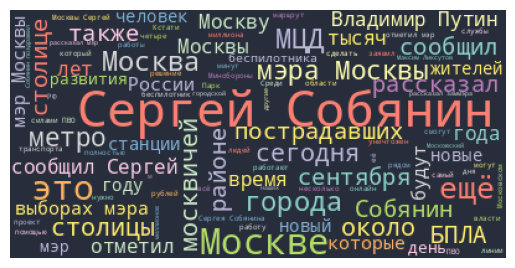

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pymorphy2
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

sobyanin_msk_23['article'] = sobyanin_msk_23['article'].apply(lambda x: x[:-64])

stop_words = stopwords.words('russian')

text = ' '.join(sobyanin_msk_23['article'])

cloud = WordCloud(stopwords=stop_words, background_color='#272d3b', colormap='Set3', max_words=100).generate(text)

plt.imshow(cloud)
plt.axis('off')

In [3]:
#posts from 2018 year
import vk_api
from datetime import datetime

def get_posts_in_period(api_token, group_id, count=100, max_posts=3200):
    # Get posts from the public page
    try:
        # Initialization VK API session
        vk_session = vk_api.VkApi(token=api_token)
        vk = vk_session.get_api()

        all_posts = []

        offset = 40000
        while True:
             # Request
            response = vk.wall.get(owner_id=group_id, filter="owner", count=count, offset=offset)

            if 'items' in response:
                # Добавляем посты к общему списку
                all_posts.extend(response['items'])

                # Going to the next "page"
                offset += count

                if max_posts and len(all_posts) >= max_posts:
                    break
            else:
                print("No more posts found.")
                break

        return all_posts

    except vk_api.exceptions.ApiError as e:
        print(f"API error: {e}")
        return []


api_token = api_token
group_id = "-35068738"  #m24

posts = get_posts_in_period(api_token, group_id, max_posts=3200)

pos = []

if posts:
    print(f"Found {len(posts)} posts:")
    for post in posts:
        post_date = datetime.fromtimestamp(post['date']).strftime("%Y-%m-%d")
        pos.append([post['text'], post_date])
else:
    print("No posts found.")

import pandas as pd
df = pd.DataFrame(pos, columns = ['article', 'date'])
df


Found 3200 posts:


,article,date
0,"Москвич продаёт квартиру, в которой живёт его ...",2018-10-11
1,Веселей собаки — нету существа!,2018-10-11
2,В Госдуме хотят запретить пропаганду веселящег...,2018-10-11
3,Более 30 электричек изменят время отправления ...,2018-10-10
4,Добегались! Кокорин и Мамаев задержаны на двое...,2018-10-10
...,...,...
3195,За время «Прямой линии» Владимиру Путину успел...,2018-06-07
3196,Если вы обнаружили дикое животное в черте горо...,2018-06-07
3197,Движение в городе осуществляется по основным а...,2018-06-07
3198,Светлая память конструктору самолета Ан-124 «Р...,2018-06-07


In [4]:
#filter (months June - September) and key words like Sobyanin, mayor
up_line_month = df['date'].apply(lambda x: int(x[5:7])) <= 9
down_line_month = df['date'].apply(lambda x: int(x[5:7])) >= 6

sobyanin_msk_18 = df[((df['article'].str.contains('Собянин') == True)|(df['article'].str.contains('мэр') == True)|(df['article'].str.contains('Сергей Семёнович') == True))&(up_line_month == True)&(down_line_month == True)]
sobyanin_msk_18


,article,date
274,На строительство нового здания Третьяковской г...,2018-09-29
285,"Вместо того, чтобы стоять в очереди за новым i...",2018-09-28
346,Новая железнодорожная платформа Щукинская може...,2018-09-26
353,"Что бы вы хотели изменить там, где живёте? «Мо...",2018-09-25
356,Город заботится. Москвичи предпенсионного возр...,2018-09-25
...,...,...
3052,"Узкие тротуары, запаркованные улицы, скучная п...",2018-06-11
3065,Сергей Собянин пригласил москвичей на фестивал...,2018-06-10
3099,Столица переходит на время футбола. Сверять ча...,2018-06-09
3142,"Их призвание - помогать тем, кому больше всего...",2018-06-08


In [ ]:
sobyanin_msk_18.to_excel('sobyanin_2018.xlsx')

In [6]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 91.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=ac2a508dcff9b7b4d79b5302bcb7ec839a0f79f1ea384350217904b55b5d0114
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
pip install nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-18-d812896bd338>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sobyanin_msk_18['article'] = sobyanin_msk_18['article'].apply(lambda x: x[:-27])


(-0.5, 399.5, 199.5, -0.5)

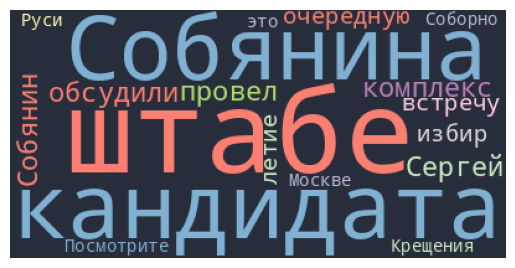

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pymorphy2
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

sobyanin_msk_18['article'] = sobyanin_msk_18['article'].apply(lambda x: x[:-27])

stop_words = stopwords.words('russian')

text = ' '.join(sobyanin_msk_18['article'])

cloud = WordCloud(stopwords=stop_words, background_color='#272d3b', colormap='Set3', max_words=100).generate(text)

plt.imshow(cloud)
plt.axis('off')